In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
data = pd.read_csv("mmorpg_player_stats.csv")
data.head()

,level,hours_played,win_loss_ratio,achievements_unlocked,player_id,class,guild_membership,overall_rank
0,71.0,79.95,35.914073,66.2,0.0,mage,0.0,440.915562
1,34.0,76.75,17.668577,30.8,1.0,warrior,1.0,285.404141
2,91.0,127.90,46.052877,73.4,2.0,ranger,0.0,577.114677
3,80.0,124.95,40.298669,70.8,3.0,warrior,1.0,704.687950
4,40.0,42.10,20.440437,44.6,4.0,mage,1.0,346.779135


In [3]:
# Encode the 'class' column into numerical format using OrdinalEncoder
encoder = OrdinalEncoder()
data['class'] = encoder.fit_transform(data[['class']])


In [4]:
# Shuffle the data
data_randomized = data.sample(frac=1, random_state=142).reset_index(drop=True)

In [5]:
data_randomized.head()

,level,hours_played,win_loss_ratio,achievements_unlocked,player_id,class,guild_membership,overall_rank
0,79.0,115.85,40.102725,69.4,25.0,1.0,1.0,632.579231
1,23.0,58.40,12.384996,29.6,61.0,2.0,0.0,276.817418
2,23.0,29.10,12.138314,23.6,42.0,2.0,0.0,304.743869
3,74.0,100.45,37.893769,70.6,33.0,2.0,0.0,548.932315
4,60.0,73.60,30.384117,59.4,81.0,1.0,0.0,497.478589


In [6]:
# Helper function to return percentage of a value
def return_percentage(value: float, perc: float) -> int:
    return round(value * perc)

In [7]:
# Splitting the data into training and testing
test_data = data_randomized[:return_percentage(len(data_randomized), 0.80)]  # 20% of the data for testing
train_data = data_randomized[return_percentage(len(data_randomized), 0.20):]  # 80% for training

In [8]:
# Splitting data into X (features) and y (target)
y_train = train_data.iloc[:, -1]
x_train = train_data.iloc[:, :-1]

y_test = test_data.iloc[:, -1]
x_test = test_data.iloc[:, :-1]

In [9]:
y_train

20    419.810958
21    419.364528
22    303.474670
23    346.779135
24    288.498169
         ...    
95    731.182427
96    505.298249
97    314.189796
98    347.885667
99    418.078834
Name: overall_rank, Length: 80, dtype: float64

In [10]:
# Training the model using Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
# Printing the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  9.1438243    0.29651077 -10.01707158   1.67485287   0.38618149
 -12.97005089 -11.27350758]
Model Intercept: 127.01356514686205


In [12]:
# Testing the model
model_score = model.score(x_test, y_test)
print("Model R² Score:", model_score)

Model R² Score: 0.889005039407231


In [13]:
# Making predictions
predictions = model.predict(x_test)
print("Predictions:", predictions[:10])  # Display the first 10 predictions

Predictions: [583.66035469 277.76897723 254.16568076 558.90497338 510.90325125
 614.09956148 676.28288382 366.32685045 732.2191295  501.04889539]


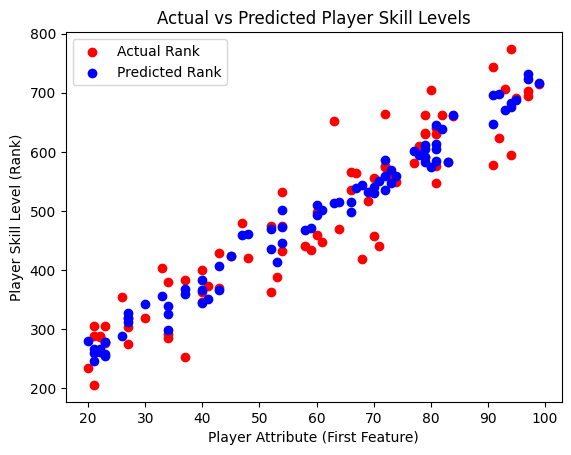

In [14]:
# Plotting the actual vs predicted ranks
plt.scatter(x_test.iloc[:, 0], y_test, color='red', label='Actual Rank')
plt.scatter(x_test.iloc[:, 0], predictions, color='blue', label='Predicted Rank')
plt.title('Actual vs Predicted Player Skill Levels')
plt.xlabel('Player Attribute (First Feature)')
plt.ylabel('Player Skill Level (Rank)')
plt.legend()
plt.show()